# Analyzing Crop Production Trends in Indian States

## SECTION A: Python & Data Cleaning 

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [183]:
p = pd.read_csv(r"C:\Users\Lenovo\Downloads\crop_yield.csv")     #loading dataset 
p

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19684,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19685,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19686,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19687,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [185]:
# Reviewing data structure
# To show number of rows and columns 
p.shape       

(19689, 10)

In [187]:
# To show the list of all the column names
p.columns   

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [189]:
# To preview first few rows
p.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [191]:
# Reviewing data types
p.dtypes

Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object

In [193]:
# Reviewing data's missing values
p.isnull().sum()	

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [195]:
#Standardize crop names and state/district names 
# Cleaning crop names
p['Crop'] = p['Crop'].str.strip()       # removes any spaces before or after the text
p['Crop'] = p['Crop'].str.title()       # Convert to Title Case (e.g., "rice" → "Rice")

# Cleaning state names
p['State'] = p['State'].str.strip()     # Remove extra spaces
p['State'] = p['State'].str.title()     # Convert to Title Case

# Showing cleaned unique values 
print("Unique Crops:", p['Crop'].unique())
print("Unique States:", p['State'].unique())

Unique Crops: ['Arecanut' 'Arhar/Tur' 'Castor Seed' 'Coconut' 'Cotton(Lint)'
 'Dry Chillies' 'Gram' 'Jute' 'Linseed' 'Maize' 'Mesta' 'Niger Seed'
 'Onion' 'Other  Rabi Pulses' 'Potato' 'Rapeseed &Mustard' 'Rice'
 'Sesamum' 'Small Millets' 'Sugarcane' 'Sweet Potato' 'Tapioca' 'Tobacco'
 'Turmeric' 'Wheat' 'Bajra' 'Black Pepper' 'Cardamom' 'Coriander' 'Garlic'
 'Ginger' 'Groundnut' 'Horse-Gram' 'Jowar' 'Ragi' 'Cashewnut' 'Banana'
 'Soyabean' 'Barley' 'Khesari' 'Masoor' 'Moong(Green Gram)'
 'Other Kharif Pulses' 'Safflower' 'Sannhamp' 'Sunflower' 'Urad'
 'Peas & Beans (Pulses)' 'Other Oilseeds' 'Other Cereals' 'Cowpea(Lobia)'
 'Oilseeds Total' 'Guar Seed' 'Other Summer Pulses' 'Moth']
Unique States: ['Assam' 'Karnataka' 'Kerala' 'Meghalaya' 'West Bengal' 'Puducherry' 'Goa'
 'Andhra Pradesh' 'Tamil Nadu' 'Odisha' 'Bihar' 'Gujarat' 'Madhya Pradesh'
 'Maharashtra' 'Mizoram' 'Punjab' 'Uttar Pradesh' 'Haryana'
 'Himachal Pradesh' 'Tripura' 'Nagaland' 'Chhattisgarh' 'Uttarakhand'
 'Jharkhand' '

In [197]:
# Handle missing or anomalous production or area values
# Treating 0 as missing in 'Area' and 'Production'
p['Area'] = p['Area'].replace(0, np.nan)
p['Production'] = p['Production'].replace(0, np.nan)

# Showing how many values are missing now
print("Missing Area values:", p['Area'].isnull().sum())
print("Missing Production values:", p['Production'].isnull().sum())

# Filling missing values using the median (can also use mean)
p['Area'] = p['Area'].fillna(p['Area'].median())
p['Production'] = p['Production'].fillna(p['Production'].median())

# Checking again
print("After filling:")
print("Missing Area values:", p['Area'].isnull().sum())
print("Missing Production values:", p['Production'].isnull().sum())

Missing Area values: 0
Missing Production values: 112
After filling:
Missing Area values: 0
Missing Production values: 0


In [199]:
# Create derived columns: 
#       o Yield if not given: Production / Area 
#       o Production per Season per State aggregated annually 
#       o Year-over-Year change (%) in production and yield 

# 1. Creating Yield column
p['Yield'] = p['Production'] / p['Area']

# 2. Total Production per Season per State per Year
grouped = p.groupby(['State', 'Season', 'Crop_Year'])['Production'].sum().reset_index()
grouped.rename(columns={'Production': 'Total_Production'}, inplace=True)

# 3. Year-over-Year change (%) in Production and Yield
p = p.sort_values(['State', 'Crop', 'Crop_Year'])
p['Prod_Change_%'] = p.groupby(['State', 'Crop'])['Production'].pct_change() * 100
p['Yield_Change_%'] = p.groupby(['State', 'Crop'])['Yield'].pct_change() * 100

In [203]:
p

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Prod_Change_%,Yield_Change_%
490,Arecanut,2000,Whole Year,Andhra Pradesh,262.0,724.0,935.6,25720.54,68.12,2.763359,NaN,NaN
757,Arecanut,2001,Whole Year,Andhra Pradesh,268.0,449.0,928.4,27370.84,69.68,1.675373,-37.983425,-39.371856
1014,Arecanut,2002,Whole Year,Andhra Pradesh,296.0,427.0,648.1,28022.32,74.00,1.442568,-4.899777,-13.895744
1220,Arecanut,2003,Whole Year,Andhra Pradesh,311.0,221.0,826.0,30782.78,74.64,0.710611,-48.243560,-50.739851
1666,Arecanut,2005,Whole Year,Andhra Pradesh,293.0,234.0,1075.5,35136.56,61.53,0.798635,5.882353,12.387071
...,...,...,...,...,...,...,...,...,...,...,...,...
14757,Wheat,2015,Rabi,West Bengal,339851.0,788503.0,1717.0,53665871.41,112150.83,2.320143,-16.050078,-17.337298
15373,Wheat,2016,Rabi,West Bengal,321621.0,862712.0,1795.8,49288418.25,112567.35,2.682387,9.411378,15.612993
16006,Wheat,2017,Rabi,West Bengal,117360.0,362744.0,1830.0,18477158.40,44596.80,3.090866,-57.953060,15.228178
16641,Wheat,2018,Rabi,West Bengal,112147.0,337751.0,2012.6,18190243.40,39251.45,3.011681,-6.889983,-2.561891


In [211]:
def clean_crop_data():
    import pandas as pd

    # Load the original dataset
    df = pd.read_csv(r"C:\Users\Lenovo\Downloads\crop_yield.csv")

    # Step 1: Convert 'Production' and 'Yield' to numeric
    df['Production'] = pd.to_numeric(df['Production'], errors='coerce')
    df['Yield'] = pd.to_numeric(df['Yield'], errors='coerce')

    # Step 2: Drop rows with missing values in key columns
    df = df.dropna(subset=['Production', 'Yield', 'State', 'Crop', 'Season', 'Crop_Year'])

    # Step 3: Strip extra spaces from text columns
    df['State'] = df['State'].str.strip()
    df['Crop'] = df['Crop'].str.strip()
    df['Season'] = df['Season'].str.strip()

    # Step 4: Remove invalid Crop_Year values
    df = df[df['Crop_Year'].between(1950, 2025)]

    # Step 5: Remove rows with zero or negative Yield/Production
    df = df[(df['Yield'] > 0) & (df['Production'] > 0)]

    # Step 6: Drop duplicate rows (if any)
    df = df.drop_duplicates()

    # Optional: Save cleaned data to a new CSV file
    df.to_csv("crop_yield_cleaned.csv", index=False)
    print("✅ Cleaned dataset saved as 'crop_yield_cleaned.csv'")

    return df

# Call the function
df_cleaned = clean_crop_data()

✅ Cleaned dataset saved as 'crop_yield_cleaned.csv'


## SECTION B: SQL Operations 

## SECTION C: EDA & Descriptive Statistics  

### Exploratory Data Analysis: 

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


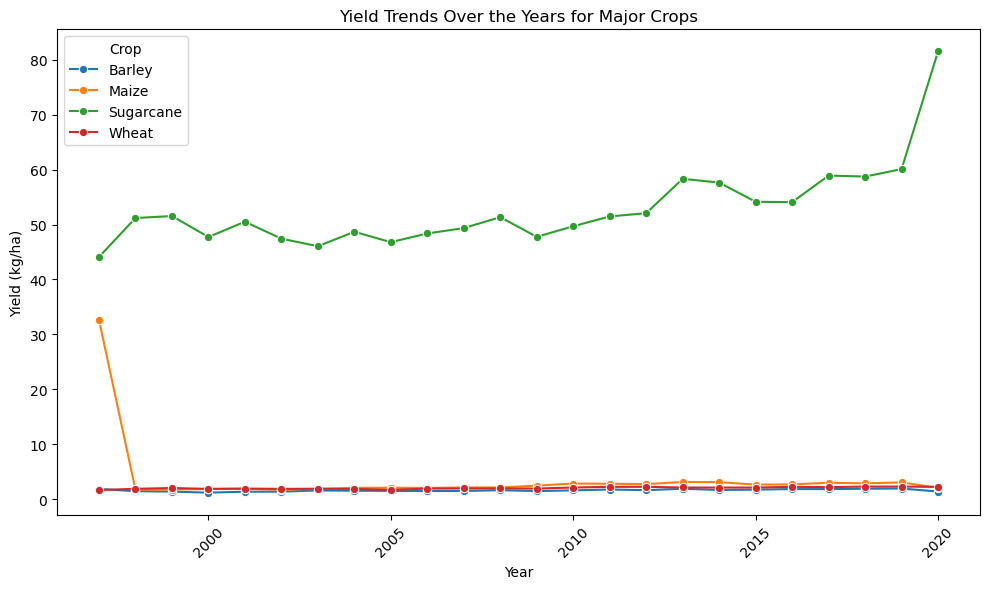

In [232]:
# Line plots showing yield trends over the years for major crops (paddy, wheat, etc.) 
# Filtering major crops that we want to track 
major_crops = ['Paddy', 'Wheat', 'Maize', 'Sugarcane', 'Barley']

# Filtering dataset to only include major crops
major_crop_data = df_cleaned[df_cleaned['Crop'].isin(major_crops)]

# Group by Year and Crop, and take average yield for each combination
yield_trends = major_crop_data.groupby(['Crop_Year', 'Crop'])['Yield'].mean().reset_index()

#  Ploting a line chart to show how yield changes over time for each crop
plt.figure(figsize=(10, 6))
sns.lineplot(data=yield_trends, x='Crop_Year', y='Yield', hue='Crop', marker='o')

# Adding titles and labels for better readability
plt.title("Yield Trends Over the Years for Major Crops")
plt.xlabel("Year")
plt.ylabel("Yield (kg/ha)")
plt.legend(title="Crop")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


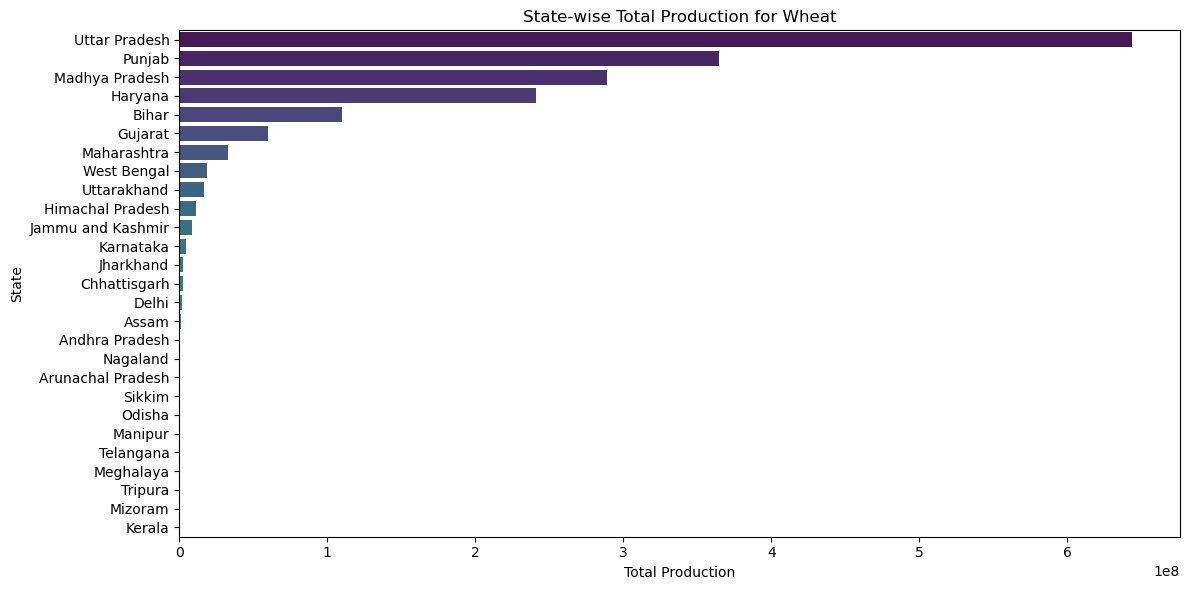

In [234]:
#  Bar charts for state-wise total production per crop 
# Choose a crop for analyzing (e.g., Wheat)
selected_crop = 'Wheat'

# Filtering the dataset to only include rows for that selected crop
crop_data = df_cleaned[df_cleaned['Crop'] == selected_crop]

# Group by each state and calculate total production for that crop
state_prod = crop_data.groupby('State')['Production'].sum().sort_values(ascending=False).reset_index()

# Plot a horizontal bar chart showing total production by state
plt.figure(figsize=(12, 6))

# Use barplot to show Production on x-axis and State on y-axis
sns.barplot(x='Production', y='State', data=state_prod, hue='State', palette='viridis', legend=False)

# Add title and labels
plt.title(f"State-wise Total Production for {selected_crop}")
plt.xlabel("Total Production")
plt.ylabel("State")
plt.tight_layout()
plt.show()


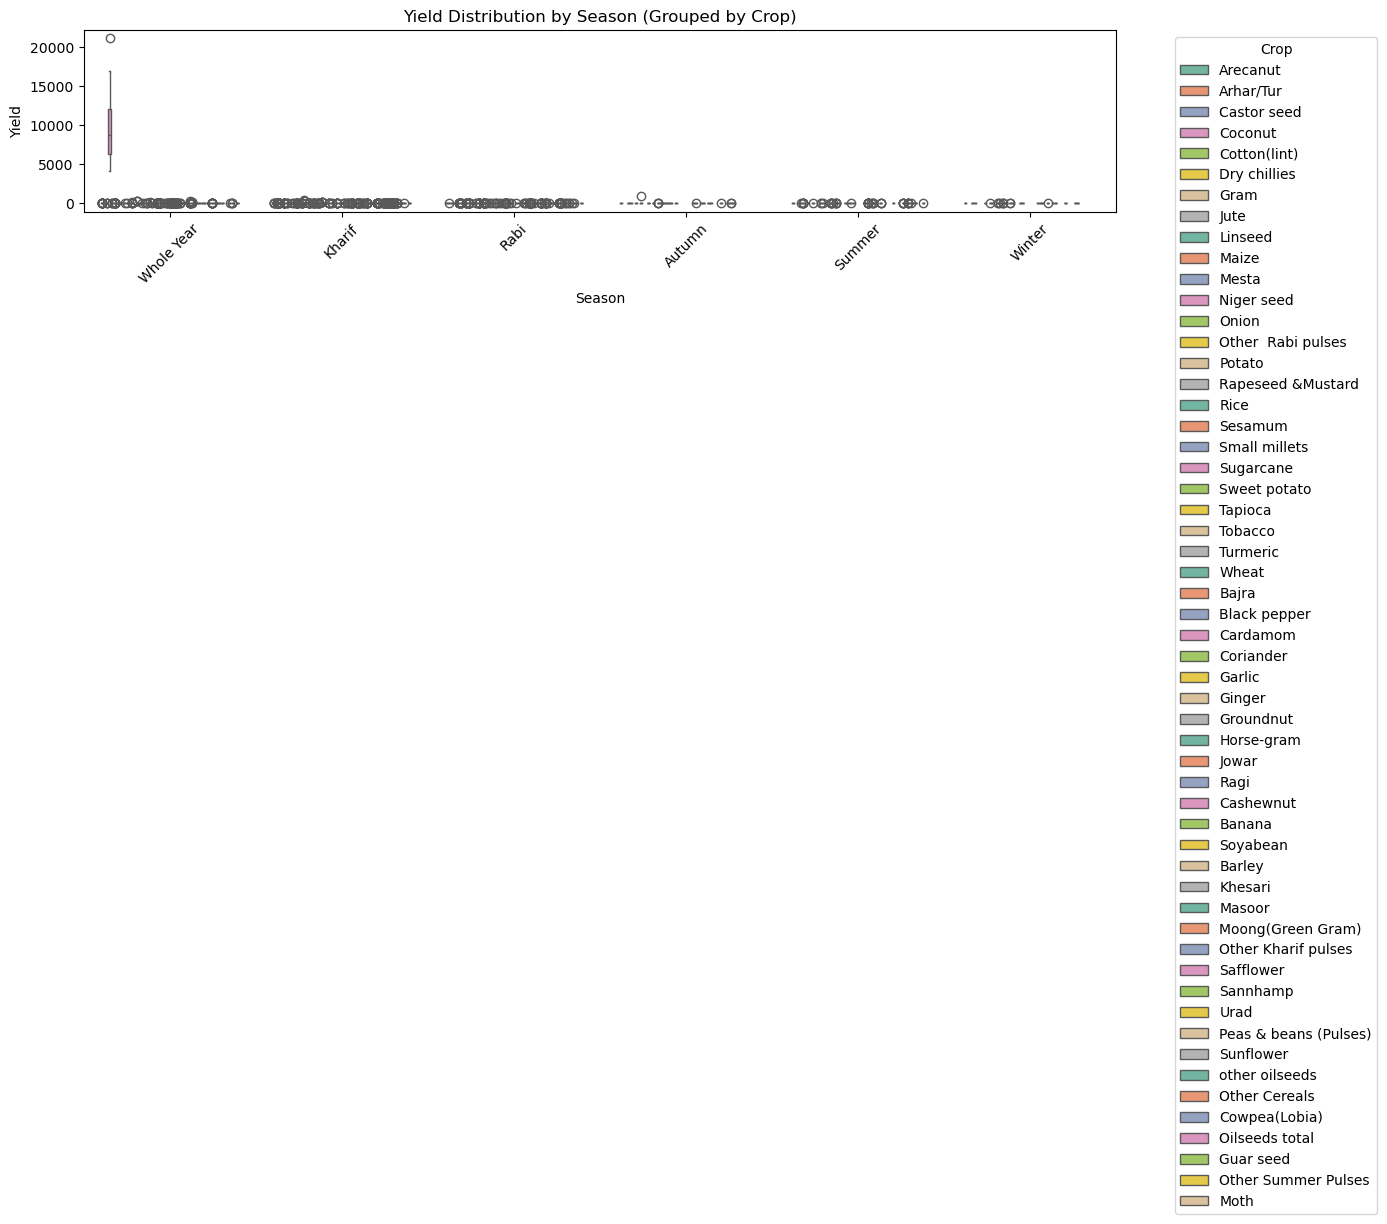

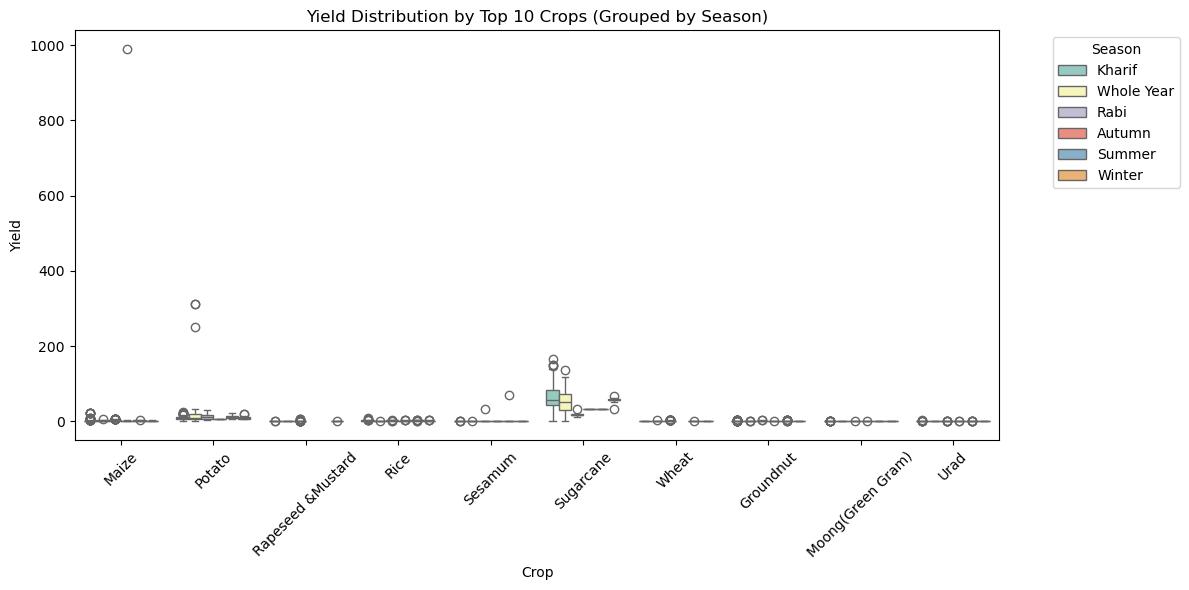

In [236]:
# Boxplots comparing yield distributions across seasons and crops 
# 1. Boxplot: Yield across Seasons grouped by Crop
plt.figure(figsize=(14, 8))  # setting the figure size

# Creating a boxplot showing Yield for each Season, grouped by Crop using different colors
sns.boxplot(data=df_cleaned, x='Season', y='Yield', hue='Crop', palette='Set2')

# Add title and format axes
plt.title("Yield Distribution by Season (Grouped by Crop)")
plt.xticks(rotation=45)    # Rotate x-axis labels for better readability
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()    # Fix layout issues
plt.show()


# 2. Boxplot: Yield across Crops (Top 10 crops only for clarity)

# Getting the top 10 most frequent crops in the dataset
top_crops = df_cleaned['Crop'].value_counts().head(10).index

# Filtering the dataset to only include those top 10 crops
filtered_data = df_cleaned[df_cleaned['Crop'].isin(top_crops)]

# Creating a boxplot showing Yield for each Crop, grouped by Season
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='Crop', y='Yield', hue='Season', palette='Set3')

# Adding title and format
plt.title("Yield Distribution by Top 10 Crops (Grouped by Season)")
plt.xticks(rotation=45)
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

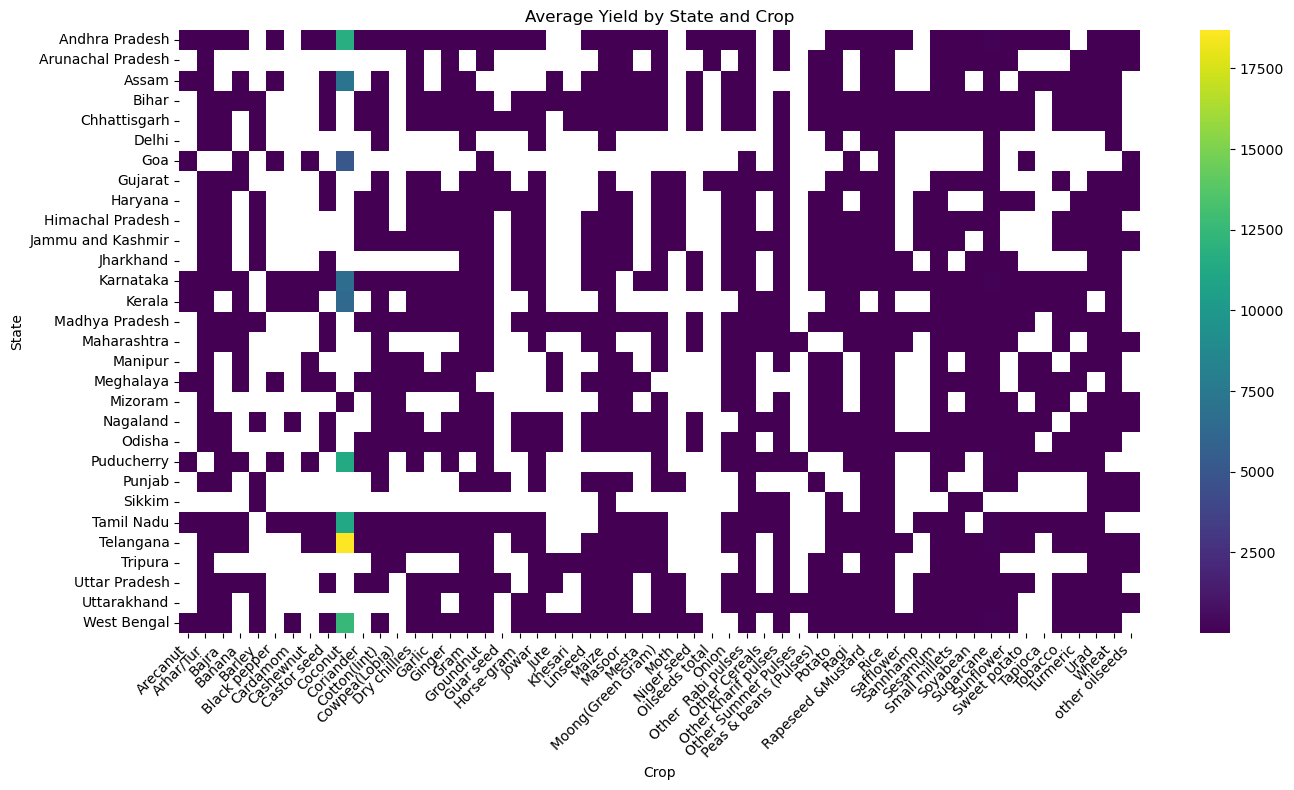

In [238]:
# Heatmap: state × crop showing average yield 
# Create pivot table (State as rows, Crop as columns, values = average Yield)
heatmap_data = df_cleaned.pivot_table(values='Yield', index='State', columns='Crop', aggfunc='mean')

# Plotting heatmap using seaborn  
plt.figure(figsize=(14, 8))             # Setting the size of the heatmap
sns.heatmap(heatmap_data, cmap='viridis')     # 'viridis' is the color map

# Add title and axis labels
plt.title("Average Yield by State and Crop")
plt.xlabel("Crop")
plt.ylabel("State")
plt.xticks(rotation=45, ha='right')   # Rotate crop labels for readability
plt.tight_layout()          # Adjust layout to prevent overlap
plt.show()

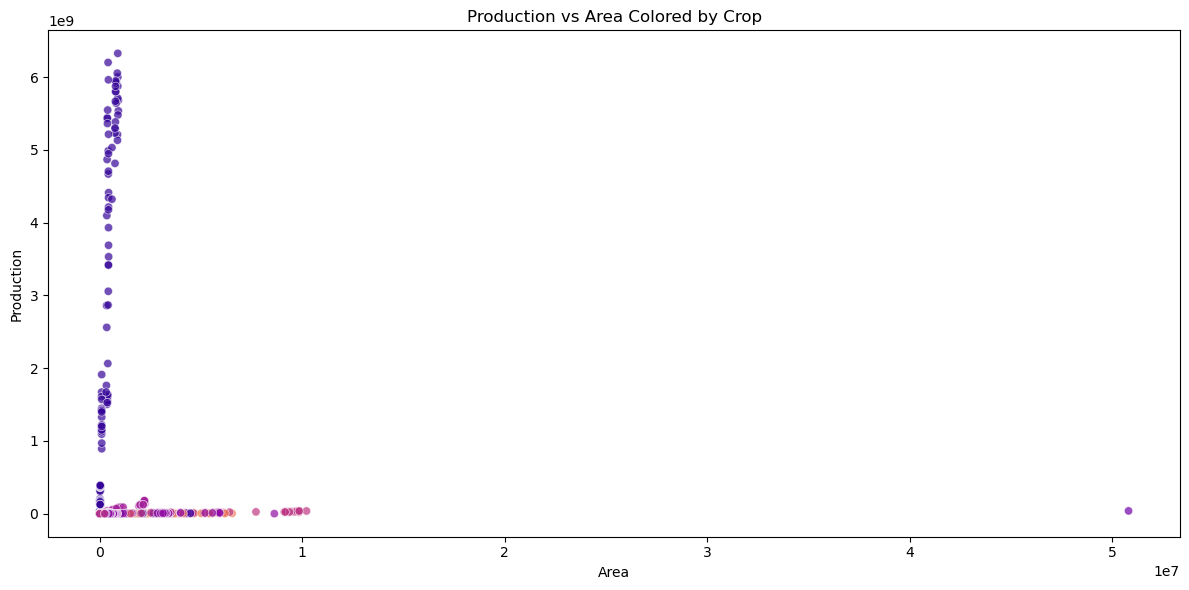

In [240]:
# Scatter plots: production vs area with crop labels

# Filtering to remove rows of Area and Production with missing or zero values
filtered_df = df_cleaned[(df_cleaned['Area'] > 0) & (df_cleaned['Production'] > 0)]

plt.figure(figsize=(12, 6))    # creating figure and set size

# Creating a scatter plot where x-axis: Area, y-axis:Production
sns.scatterplot(data=df_cleaned, x='Area', y='Production', hue='Crop', palette='plasma', alpha=0.7, legend=False)

# Adding title and axis label
plt.title("Production vs Area Colored by Crop")
plt.xlabel("Area")
plt.ylabel("Production")
plt.tight_layout()
plt.show()

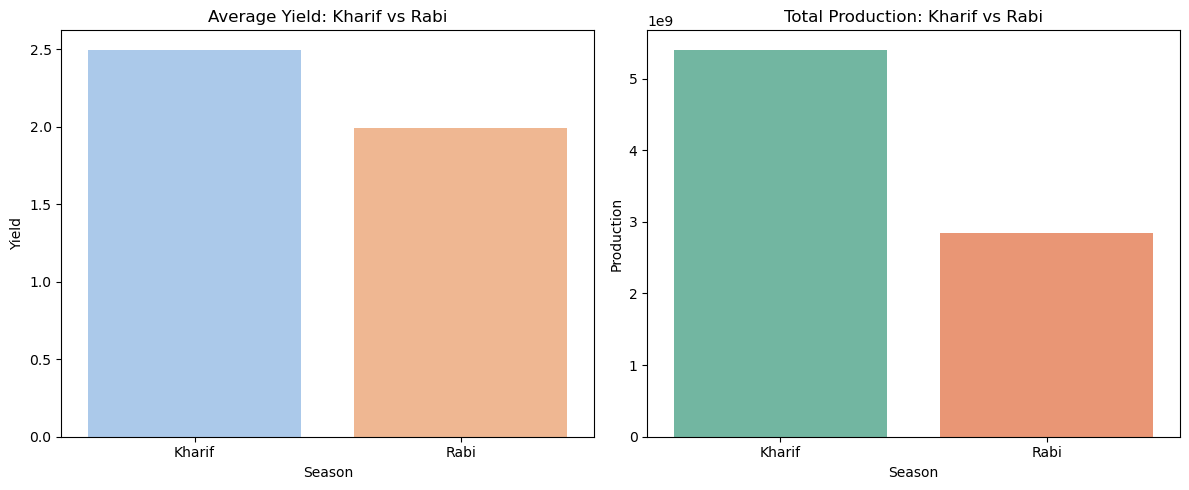

In [242]:
# Seasonal comparison: yield and production difference between Kharif and Rabi seasons

# Creating 2 side-by-side subplots one for Average Yield and another for Total Production
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart for Average Yield by season
sns.barplot(data=season_summary, x='Season', y='Yield', hue='Season', ax=axs[0], palette='pastel',legend=False)
axs[0].set_title("Average Yield: Kharif vs Rabi")     # Title for first chart
axs[0].set_ylabel("Yield")                           # Y-axis label

# Bar chart for Production
sns.barplot(data=season_summary, x='Season', y='Production', hue='Season', ax=axs[1], palette='Set2', legend=False)
axs[1].set_title("Total Production: Kharif vs Rabi")    #Title for second chart
axs[1].set_ylabel("Production")                         # Y-axis label

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

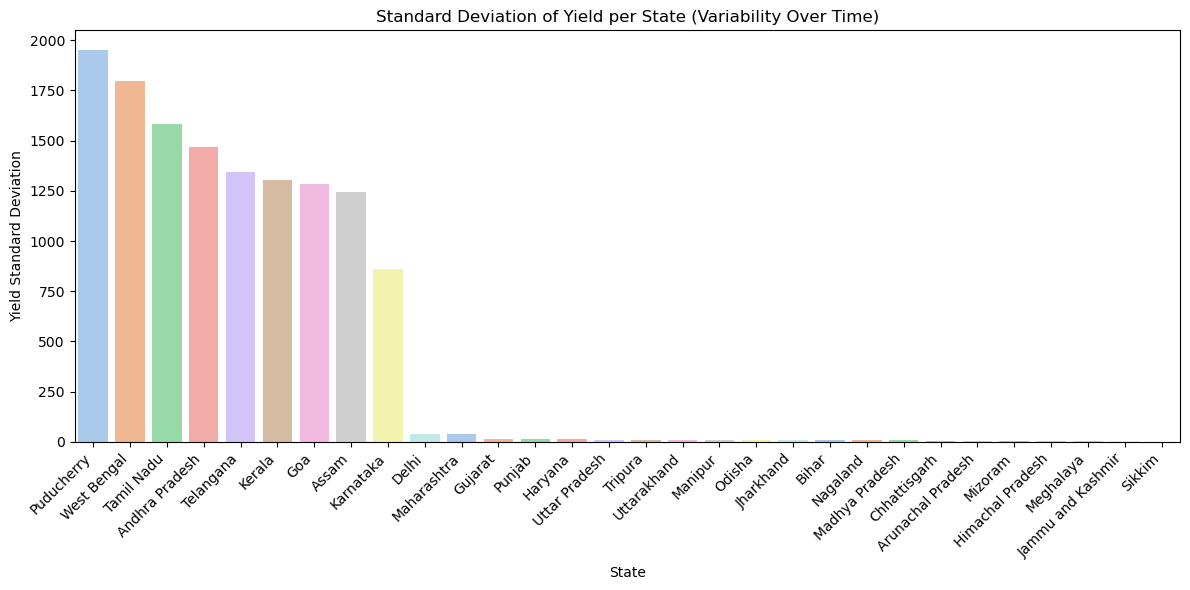

In [276]:
# Variability plots: standard deviation of yield per state over time

# Group data by State and calculate the standard deviation of Yield
# This shows how much yield values vary in each state over time
state_yield_std = df_cleaned.groupby('State')['Yield'].std().reset_index()

# Sort states in descending order of yield variability
state_yield_std = state_yield_std.sort_values(by='Yield', ascending=False)

# Step 3: Plot a bar chart  to show variability (standard deviation) per state
plt.figure(figsize=(12, 6))      # Set the size of the plot
sns.barplot(data=state_yield_std, x='State', y='Yield', hue='State', palette='pastel', legend=False)
plt.xticks(rotation=45, ha='right')    # Rotate state names for readability
plt.title("Standard Deviation of Yield per State (Variability Over Time)")
plt.ylabel("Yield Standard Deviation")     # y-axis: how much yield varies
plt.xlabel("State")                        # x-axis: states
plt.tight_layout()       # To fix any spacing issues
plt.show()

### Descriptive Statistics:

In [249]:
df = pd.read_csv(r"crop_yield_cleaned.csv")     #loading dataset 
df

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909
...,...,...,...,...,...,...,...,...,...,...
19568,Small millets,1998,Kharif,Nagaland,4000.0,2000,1498.0,395200.00,1160.00,0.500000
19569,Wheat,1998,Rabi,Nagaland,1000.0,3000,1498.0,98800.00,290.00,3.000000
19570,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1356.2,29586735.11,96373.73,1.285000
19571,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1356.2,26242746.82,85481.26,0.016667


In [257]:
# Compute mean, median, variance, and standard deviation of yield and production 

# Calculate statistical values (mean, median, variance, and standard deviation) for the 'Yield' column
yield_stats = df['Yield'].agg(['mean', 'median', 'var', 'std'])

# Calculate statistical values (mean, median, variance, and standard deviation) for the 'Production' column
production_stats = df['Production'].agg(['mean', 'median', 'var', 'std'])

# Print the statistics for Yield
print("Stats for Yield:")
print(yield_stats)

# Print a separator line for clarity
print('-----------------------------')

# Print the statistics for Production
print("Stats for Production:")
print(production_stats)


Stats for Yield:
mean          80.427777
median         1.037500
var       775955.757450
std          880.883510
Name: Yield, dtype: float64
-----------------------------
Stats for Production:
mean      1.653335e+07
median    1.410000e+04
var       6.960742e+16
std       2.638322e+08
Name: Production, dtype: float64


In [259]:
# Calculate coefficient of variation for yield across states and crops 

# Coefficient of Variation (CV) for Yield = Standard Deviation / Mean
# This helps us understand how much the Yield values vary relative to the average

# -------------------------
# Calculate CV for Yield across different States:
cv_state = df.groupby('State')['Yield'].agg(['mean', 'std'])  # Group by State and calculate mean and std
cv_state['CV_Yield'] = cv_state['std'] / cv_state['mean']     # Compute Coefficient of Variation for each State

# Calculate CV for Yield across different Crops:
cv_crop = df.groupby('Crop')['Yield'].agg(['mean', 'std'])    # Group by Crop and calculate mean and std
cv_crop['CV_Yield'] = cv_crop['std'] / cv_crop['mean']        # Compute Coefficient of Variation for each Crop

# Print CV values for States, sorted from lowest to highest (lower CV = more stable Yield)
print("CV by State:")
print(cv_state.sort_values('CV_Yield'))

# Print CV values for Crops, sorted from lowest to highest
print("CV by Crop:")
print(cv_crop.sort_values('CV_Yield'))


CV by State:
                         mean          std   CV_Yield
State                                                
Sikkim               1.232856     0.818228   0.663685
Meghalaya            2.878788     2.840323   0.986638
Arunachal Pradesh    3.735060     4.949417   1.325124
Mizoram              2.574472     4.096433   1.591174
Jammu and Kashmir    1.312389     2.196662   1.673789
Himachal Pradesh     1.902585     3.199338   1.681574
Manipur              5.216999    10.235283   1.961910
Uttar Pradesh        5.053113    11.242641   2.224894
Madhya Pradesh       3.470136     7.791152   2.245201
Jharkhand            3.609723     8.224205   2.278348
Bihar                3.476499     7.961980   2.290230
Nagaland             3.402534     7.807829   2.294710
Gujarat              6.697227    15.944671   2.380787
Haryana              5.780056    13.924610   2.409079
Tripura              4.289017    11.058651   2.578365
Chhattisgarh         2.015185     5.609683   2.783706
Uttarakhand    

In [261]:
# Rank top 3 crops with the lowest yield variability 

# -------------------------
# Finding the top 3 crops with the lowest yield variability (i.e., most consistent yield)

# Sorting crops by Coefficient of Variation (CV_Yield) in ascending order and selecting the top 3 with the lowest CV
top_3_crops = cv_crop.sort_values('CV_Yield').head(3)

# Printing the names and CV values of the top 3 crops with the most stable yield
print("\nTop 3 Crops with Lowest Yield Variability:")
print(top_3_crops[['CV_Yield']])



Top 3 Crops with Lowest Yield Variability:
         CV_Yield
Crop             
Khesari  0.289694
Masoor   0.339305
Rice     0.361713


In [263]:
#  Identify outlier seasons/states with extreme low or high yield (IQR method)

# -------------------------
# Calculate the 1st quartile (Q1) and 3rd quartile (Q3) for the 'Yield' column
Q1 = df['Yield'].quantile(0.25)
Q3 = df['Yield'].quantile(0.75)

# Calculate the Interquartile Range (IQR = Q3 - Q1)
IQR = Q3 - Q1

# Identify outliers using the standard IQR method:
# An outlier is a value that is either:
#    - below Q1 - 1.5 * IQR  (too small)
#    - above Q3 + 1.5 * IQR  (too large)
outliers = df[(df['Yield'] < Q1 - 1.5 * IQR) | (df['Yield'] > Q3 + 1.5 * IQR)]

# Print the outlier rows showing State, Season, Crop Year, and Yield
print("\nOutliers in Yield:")
print(outliers[['State', 'Season', 'Crop_Year', 'Yield']])


Outliers in Yield:
           State      Season  Crop_Year        Yield
3          Assam  Whole Year       1997  5238.051739
7          Assam      Kharif       1997     9.919565
14         Assam  Whole Year       1997     7.561304
21         Assam      Kharif       1997    41.896957
54     Karnataka  Whole Year       1997    91.747368
...          ...         ...        ...          ...
19502     Odisha      Winter       2016    56.160400
19520     Odisha      Winter       2017    11.955455
19531     Odisha      Winter       2017    56.588000
19549     Odisha      Winter       2018    13.017308
19560     Odisha      Winter       2018    57.584545

[3050 rows x 4 columns]


In [265]:
# Year-over-year growth rate in production for key crops 

# -------------------------
# Group data by Crop and Crop_Year and calculate total production per year for each crop
df_grouped_year_crop = df.groupby(['Crop', 'Crop_Year'])['Production'].sum().reset_index()

# Sort the data so that years are in order within each crop group
df_grouped_year_crop = df_grouped_year_crop.sort_values(by=['Crop', 'Crop_Year'])

# Calculate Year-over-Year growth % for each crop using pct_change()
# It compares current year's production with previous year's and gives percentage change
df_grouped_year_crop['YoY_Growth_%'] = df_grouped_year_crop.groupby('Crop')['Production'].pct_change() * 100

# Round the growth percentages to 2 decimal places for better readability
df_grouped_year_crop['YoY_Growth_%'] = df_grouped_year_crop['YoY_Growth_%'].round(2)

# Display the results, excluding rows where YoY growth couldn't be calculated (like the first year)
print("Year-over-Year Production Growth (All valid YoY values):")
print(df_grouped_year_crop[df_grouped_year_crop['YoY_Growth_%'].notnull()])


Year-over-Year Production Growth (All valid YoY values):
                Crop  Crop_Year  Production  YoY_Growth_%
1           Arecanut       1998      799274        159.01
2           Arecanut       1999      163905        -79.49
3           Arecanut       2000      348215        112.45
4           Arecanut       2001      369214          6.03
5           Arecanut       2002      178405        -51.68
...              ...        ...         ...           ...
1255  other oilseeds       2016        5118        -94.23
1256  other oilseeds       2017     1787278      34821.41
1257  other oilseeds       2018     1973742         10.43
1258  other oilseeds       2019     2289394         15.99
1259  other oilseeds       2020          30       -100.00

[1205 rows x 4 columns]


In [270]:
print(df['Crop_Year'].unique())

[1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


In [274]:
# Correlation analysis: production and yield relationships across states

# -------------------------
# Group data by State and calculate the average Yield and Production for each state
state_corr = df.groupby('State')[['Yield', 'Production']].mean()

# Compute the correlation coefficient between Yield and Production across states
# This tells us if higher yield is associated with higher production (or not)
correlation = state_corr.corr().loc['Yield', 'Production']

# Print the correlation result with 4 decimal places
print("\nQ13: Correlation between Yield and Production across states:")
print(f"Correlation Coefficient: {correlation:.4f}")




Q13: Correlation between Yield and Production across states:
Correlation Coefficient: 0.4658


## SECTION D: Tableau Dashboard 

## SECTION E: Machine Learning 

### Regression Task:

In [288]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [290]:
# Regression Task:

# filter for one state-crop pair
state_crop_df = df[(df['State'] == 'Andhra Pradesh') & (df['Crop'] == 'Rice')]

# checking the structure
state_crop_df.head()

# Features and target
X = state_crop_df[['Crop_Year', 'Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']]
y = state_crop_df['Production']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))


from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("\nGradient Boosting Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("R²:", r2_score(y_test, y_pred_gb))


Linear Regression:
MSE: 246055987348.30975
R²: 0.903836559854752

Random Forest Regressor:
MSE: 278577215341.0295
R²: 0.8911266347875726

Gradient Boosting Regressor:
MSE: 286989895557.3625
R²: 0.8878387966042275


In [292]:
# Classification Task:

#divide yield into 3 categories: Low, Medium, High
df['Yield_Category'] = pd.qcut(df['Yield'], q=3, labels=['Low', 'Medium', 'High'])

#define features and target for classification
X_class = df[['Crop_Year', 'Area', 'Crop', 'State', 'Season']]
y_class = df['Yield_Category']

In [296]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Define models
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Train and evaluate each model
for name, clf in classifiers.items():
    clf.fit(Xc_train, yc_train)
    y_pred = clf.predict(Xc_test)
    print(f"\n{name} Results:")
    print("Accuracy:", round(accuracy_score(yc_test, y_pred), 4))
    print("Confusion Matrix:\n", confusion_matrix(yc_test, y_pred))
    print("Classification Report:\n", classification_report(yc_test, y_pred))

ValueError: could not convert string to float: 'Jowar'